<a href="https://colab.research.google.com/github/ushafromwork/Machine-Learning/blob/main/House_Price_Prediction_Regression_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Actual process but due to unavailability of boston dataset  directing reading dataset to pandas.

In [9]:
#house_price_dataset=sklearn.datasets.load_breast_cancer()
#print(house_price_dataset)

#loading the dataset to panda dataframe
#house_price_dataframe= pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)
#house_price_dataframe.head()

#adding house price to target
house_price_dataframe['price']=house_price_dataset.target

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Importing boston house price dataset

In [10]:
house_dataset=pd.read_csv('/content/boston.csv')

house_dataset.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
#Checking no.of rows and columns
house_dataset.shape

(506, 15)

In [13]:
#check for missing values
house_dataset.isnull().sum()

,0
Unnamed: 0,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0


In [14]:
#statistical measures of dataset
house_dataset.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#understanding the correlation between various features in dataset

1.positive correlation
2.Negative correlation

In [15]:
correlation=house_dataset.corr()

#constructing a heat map to understand correlation

<Axes: >

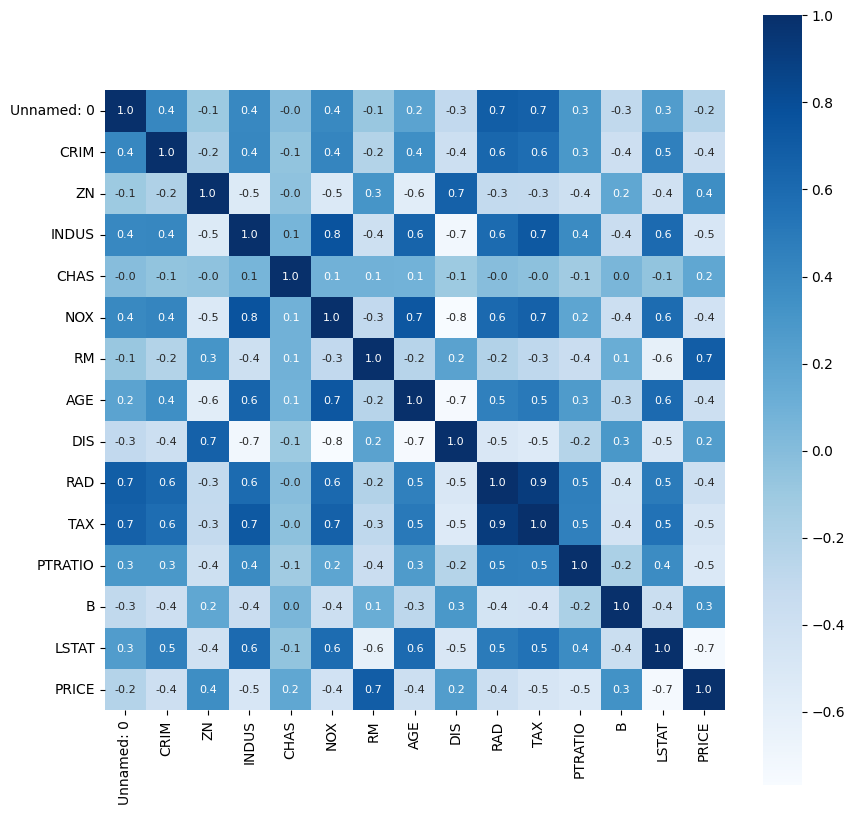

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target(price)

In [20]:
x=house_dataset.drop(columns='PRICE' ,axis=1)
y=house_dataset['PRICE']

In [21]:
print(x)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX  ...     DIS  RAD    TAX  PTRATIO       B  LSTAT
0             0  0.00632  18.0   2.31   0.0  0.538  ...  4.0900  1.0  296.0     15.3  396.90   4.98
1             1  0.02731   0.0   7.07   0.0  0.469  ...  4.9671  2.0  242.0     17.8  396.90   9.14
2             2  0.02729   0.0   7.07   0.0  0.469  ...  4.9671  2.0  242.0     17.8  392.83   4.03
3             3  0.03237   0.0   2.18   0.0  0.458  ...  6.0622  3.0  222.0     18.7  394.63   2.94
4             4  0.06905   0.0   2.18   0.0  0.458  ...  6.0622  3.0  222.0     18.7  396.90   5.33
..          ...      ...   ...    ...   ...    ...  ...     ...  ...    ...      ...     ...    ...
501         501  0.06263   0.0  11.93   0.0  0.573  ...  2.4786  1.0  273.0     21.0  391.99   9.67
502         502  0.04527   0.0  11.93   0.0  0.573  ...  2.2875  1.0  273.0     21.0  396.90   9.08
503         503  0.06076   0.0  11.93   0.0  0.573  ...  2.1675  1.0  273.0     21.0  396.90   5.64


Splitting training and test data

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(506, 14) (404, 14) (102, 14)


Model Training

In [32]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [34]:
#Prediction on Training data
prediction_train_data=model.predict(x_train)

In [35]:
print(prediction_train_data)

[23.09445   20.99228   20.104528  34.69831   13.914912  13.498504
 22.000854  15.206232  10.898076  22.688675  13.796982   5.5959272
 29.802038  49.994926  34.892696  20.604803  23.389652  19.206667
 32.705322  19.597044  27.001009   8.393553  45.992256  21.694191
 27.081312  19.393814  19.28983   24.808271  22.62144   31.703571
 18.53784    8.701313  17.409687  23.69455   13.296358  10.484301
 12.670515  24.996946  19.696505  14.900087  24.200705  24.997162
 14.898304  16.99991   15.596548  12.707401  24.497099  15.003988
 50.000412  17.52259   21.200375  32.00222   15.606369  22.901505
 19.329111  18.692701  23.293829  37.20319   30.102093  33.101288
 20.993074  49.98552   13.401927   5.0106983 16.492916   8.401298
 28.686829  19.479248  20.587677  45.404484  39.802147  33.40655
 19.803558  33.414024  25.298645  49.994335  12.5361395 17.434805
 18.607355  22.591953  50.005043  23.799427  23.305088  23.090717
 41.715034  16.104162  31.589657  36.099537   7.0034914 20.38737
 19.988699 

R Squared error

In [36]:
score_1=metrics.r2_score(y_train,prediction_train_data)

In [37]:
#Mean Absolute error
score_2=metrics.mean_absolute_error(y_train,prediction_train_data)

In [38]:
print("R squared error :", score_1)
print("Mean absolute error :", score_2)

R squared error : 0.9999981148690247
Mean absolute error : 0.00899344245986183


Visualizing actual and predicted price

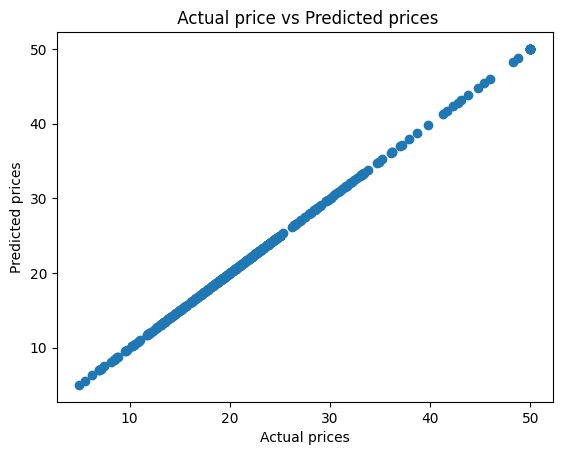

In [42]:
plt.scatter(y_train,prediction_train_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title(" Actual price vs Predicted prices")
plt.show()

#Prediction on Test data

In [40]:
#Prediction on Test data
prediction_test_data= model.predict(x_test)

In [41]:
score_1=metrics.r2_score(y_test,prediction_test_data)
#Mean Absolute error
score_2=metrics.mean_absolute_error(y_test,prediction_test_data)
print("R squared error :", score_1)
print("Mean absolute error :", score_2)

R squared error : 0.9126650746118214
Mean absolute error : 2.0080178139256493
